# Introduction

Some say climate change is the biggest threat of our age while others say it’s a myth based on dodgy science.Based on the global temperature data over the past few centuries, we can see that the world is getting warmer. Whether the cause is human activity or natural variability (the preponderance of evidence says it’s humans), thermometer readings all around the world have risen steadily since the beginning of the Industrial Revolution.The addition of man-made greenhouse gases to the Atmosphere disturbs the earth's radiative balance. This is leading to an increase in the earth's surface temperature and to related effects on climate, sea level rise and world agriculture. Emissions of CO2 are from burning oil, coal and gas for energy use, burning wood and waste materials, and from industrial processes such as cement production. Emission intensity is the average emission rate of a given pollutant from a given source relative to the intensity of a specific activity.Even data set of crop yield from year 1972 is incorporated here to see how climate change affects the yield of crops.


# Dataset description

We have performed an extensive search for the collection of appropriate datasets required to perform the analysis.

The first dataset which we acquired from kaggle was created by Berkeley Earth, which is affiliated with Lawrence Berkeley National Laboratory. The Berkeley Earth Surface Temperature Study combines 1.6 billion temperature reports from 16 pre-existing archives. The data sets contain the temperatures of various different countries across the world and the average gloabal temperatures from 1750 to 2013.Given this complexity, there are a range of organizations that collated the climate trends data. The three most cited land and ocean temperature data sets are NOAA’s MLOST, NASA’s GISTEMP and the UK’s HadCrut.


The Secondary dataset was collected from FAOSTAT, which included crop yeild data of various crops for all the countries from 1965 to 2012.
This was an extensive dataset, out of which we have chosen 3 crops: 1) Wheat, 2) Watermelon, 3) Tobacco, to perfom our analysis.


And finally we have acquired the green house gas emissons data from data.worldbank.org which is an open source data repository.
This data sets consists of the total CO2 emissions and other emissions(HFC, PFC and SF6) from 1970 to 2012.

# Expected Findings

We expect to find a correlation between human activities such as industrialization and rise in global temperatures. Thereby showing that humans collectively are responsible for global warming. 

Is cereal production affected by the increase in global temperature in specific regions?

Is higher release in greenhouse gases affecting the yield of crops across different countries?

Has industrilization contributed towards global warming?

Is there a correlation between CO2 emissions and Temperature rise?

How does the temperature vary in developed countries from developing countries?

# Let's Get Started.......

# Data Cleaning

## In order to reduce the complexity of the analysis and visualization, we have consisdered data from 1972 for most of our visualizations. We have dropped all  unecessary columns from each dataset and merged all the datasets. The dataset was then "Grouped By' to include the Average land temperature, emissions and crop yield for every country over the years.


In [1]:
#importing pandas library
import pandas as pd
# here we have taken the file which contains the data of all the countries year-wise and month-wise and has the data of average temperature and other affecting factors. 
#importing csv file. File acquired from kaggle.
data_frame = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
data_frame.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [2]:
#creating a new column called "Year" and populating it with the years from dt column.
data_frame['Year']= pd.DatetimeIndex(data_frame['dt']).year
# Filtering the data to include all years after 1970
data_frame = data_frame[data_frame["Year"] > 1970]
# Sorting data by country and the subsequent temperature for each year
results = data_frame.groupby(by="Country")['AverageTemperature']
# taking average of all the temperatures of specific year here. 
results = data_frame.groupby(["Country","Year"]).agg({'AverageTemperature': ['mean']})
results.head()


AverageTemperature
                               mean
Country     Year                   
Afghanistan 1971          14.823500
            1972          12.547167
            1973          14.235500
            1974          13.316750
            1975          13.548083

In [3]:
#Converting the data from long format to wide format
# this is done so that we can merge orur datasets in a uniform manner with each other.
average_temp = pd.pivot_table(results,values=["AverageTemperature"],columns = ["Year"],index=["Country"])
average_temp.head()

AverageTemperature                                              \
                             mean                                               
Year                         1971       1972       1973       1974       1975   
Country                                                                         
Afghanistan             14.823500  12.547167  14.235500  13.316750  13.548083   
Africa                  23.933083  24.199083  24.400083  23.830417  23.919750   
Albania                 12.534417  12.608250  12.486667  12.559833  12.568417   
Algeria                 22.672250  22.698167  22.886167  22.541000  22.716417   
American Samoa          26.402250  26.812333  27.138250  26.591250  26.773167   

                                                                       ...  \
                                                                       ...   
Year                 1976       1977       1978       1979       1980  ...   
Country                                                                ...   
Afghanistan     13.708583  14.805417  14.329667  14.262083  14.887333  ...   
Africa          23.911917  24.274250  24.222167  24.498417  24.446667  ...   
Albania         12.036250  13.223250  12.263583  12.989167  12.162083  ...   
Algeria         22.356750  23.546083  23.161833  23.396833  23.160167  ...   
American Samoa  26.721083  26.786833  26.684000  26.891333  26.990750  ...   

                                                                       \
                                                                        
Year                 2004       2005       2006       2007       2008   
Country                                                                 
Afghanistan     15.770917  14.980000  15.595583  15.106167  15.216500   
Africa          24.895917  25.156167  24.818917  24.851500  24.754667   
Albania         13.258167  12.747083  12.976917  13.890500  13.955167   
Algeria         23.916000  24.222583  24.200833  24.065333  23.950250   
American Samoa  27.281167  27.373500  27.081250  27.452417  26.995083   

                                                                       
                                                                       
Year                 2009       2010       2011       2012       2013  
Country                                                                
Afghanistan     15.257750  15.828667  15.518000  14.481583  16.533625  
Africa          25.026500  25.472500  24.786500  24.725917  25.208750  
Albania         13.844250  13.775417  13.443250  13.768250  14.993875  
Algeria         24.154333  25.215667  24.144167  23.954833  25.121500  
American Samoa  27.034250  27.453417  27.009500  27.201417  27.517250  

[5 rows x 43 columns]

In [4]:
#importing wheat yield data from faostat.
wheat_data = pd.read_csv("wheat_data.csv")
#filtering out the wheat data
# here we are only concerned with the data of yield and not with the data of "Area Hervested","Production" and "Item" 
wheat_data = wheat_data[wheat_data.Element != "Area harvested"]
wheat_data = wheat_data[wheat_data.Element != "Production"]
wheat_data = wheat_data[wheat_data['Item']=='Wheat']
wheat_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
168,QC,Crops,2,Afghanistan,5419,Yield,15,Wheat,1972,1972,hg/ha,8457.0,Fc,Calculated data
169,QC,Crops,2,Afghanistan,5419,Yield,15,Wheat,1973,1973,hg/ha,11739.0,Fc,Calculated data
170,QC,Crops,2,Afghanistan,5419,Yield,15,Wheat,1974,1974,hg/ha,12074.0,Fc,Calculated data
171,QC,Crops,2,Afghanistan,5419,Yield,15,Wheat,1975,1975,hg/ha,12128.0,Fc,Calculated data
172,QC,Crops,2,Afghanistan,5419,Yield,15,Wheat,1976,1976,hg/ha,12494.0,Fc,Calculated data


In [5]:
#Converting the data from long format to wide format
wheat_data= pd.pivot_table(wheat_data,values=["Value"],columns = ["Year"],index=["Area","Item"])
wheat_data.head()

Value                                               \
Year                  1972     1973     1974     1975     1976     1977   
Area        Item                                                          
Afghanistan Wheat   8457.0  11739.0  12074.0  12128.0  12494.0  11309.0   
Albania     Wheat  19000.0  20097.0  20625.0  19375.0  25526.0  24500.0   
Algeria     Wheat   6701.0   4934.0   4957.0   8313.0   7101.0   4337.0   
Angola      Wheat  11592.0   8867.0  13065.0  10000.0  10000.0   7692.0   
Argentina   Wheat  15911.0  16574.0  14103.0  16260.0  17045.0  13612.0   

                                                       ...                    \
Year                  1978     1979     1980     1981  ...     2004     2005   
Area        Item                                       ...                     
Afghanistan Wheat  11980.0  12317.0  12549.0  12350.0  ...  12659.0  18215.0   
Albania     Wheat  24500.0  24900.0  25198.0  25321.0  ...  31130.0  31582.0   
Algeria     Wheat   5809.0   5553.0   7297.0   6720.0  ...  13582.0  15057.0   
Angola      Wheat   5882.0   5333.0   5833.0   6316.0  ...  12412.0  10860.0   
Argentina   Wheat  17396.0  16934.0  15596.0  14014.0  ...  25441.0  26356.0   

                                                                         \
Year                  2006     2007     2008     2009     2010     2011   
Area        Item                                                          
Afghanistan Wheat  13760.0  18183.0  12263.0  19666.0  19252.0  15179.0   
Albania     Wheat  30787.0  35496.0  40168.0  40229.0  39905.0  42301.0   
Algeria     Wheat  15068.0  12742.0  11038.0  15975.0  14838.0  17405.0   
Angola      Wheat  10000.0  10000.0  10000.0  10000.0  10526.0  10959.0   
Argentina   Wheat  25302.0  26234.0  28271.0  19628.0  27113.0  35063.0   

                                     
Year                  2012     2013  
Area        Item                     
Afghanistan Wheat  20104.0  20248.0  
Albania     Wheat  41096.0  41292.0  
Algeria     Wheat  17639.0  19100.0  
Angola      Wheat  11294.0   9399.0  
Argentina   Wheat  32199.0  26581.0  

[5 rows x 42 columns]

In [6]:
#saving the wheat dataframe to csv format so we can use it further in the analysis.
wheat_data.to_csv("wheat_data_pivoted_only_wheat.csv")
average_temp.head()

AverageTemperature                                              \
                             mean                                               
Year                         1971       1972       1973       1974       1975   
Country                                                                         
Afghanistan             14.823500  12.547167  14.235500  13.316750  13.548083   
Africa                  23.933083  24.199083  24.400083  23.830417  23.919750   
Albania                 12.534417  12.608250  12.486667  12.559833  12.568417   
Algeria                 22.672250  22.698167  22.886167  22.541000  22.716417   
American Samoa          26.402250  26.812333  27.138250  26.591250  26.773167   

                                                                       ...  \
                                                                       ...   
Year                 1976       1977       1978       1979       1980  ...   
Country                                                                ...   
Afghanistan     13.708583  14.805417  14.329667  14.262083  14.887333  ...   
Africa          23.911917  24.274250  24.222167  24.498417  24.446667  ...   
Albania         12.036250  13.223250  12.263583  12.989167  12.162083  ...   
Algeria         22.356750  23.546083  23.161833  23.396833  23.160167  ...   
American Samoa  26.721083  26.786833  26.684000  26.891333  26.990750  ...   

                                                                       \
                                                                        
Year                 2004       2005       2006       2007       2008   
Country                                                                 
Afghanistan     15.770917  14.980000  15.595583  15.106167  15.216500   
Africa          24.895917  25.156167  24.818917  24.851500  24.754667   
Albania         13.258167  12.747083  12.976917  13.890500  13.955167   
Algeria         23.916000  24.222583  24.200833  24.065333  23.950250   
American Samoa  27.281167  27.373500  27.081250  27.452417  26.995083   

                                                                       
                                                                       
Year                 2009       2010       2011       2012       2013  
Country                                                                
Afghanistan     15.257750  15.828667  15.518000  14.481583  16.533625  
Africa          25.026500  25.472500  24.786500  24.725917  25.208750  
Albania         13.844250  13.775417  13.443250  13.768250  14.993875  
Algeria         24.154333  25.215667  24.144167  23.954833  25.121500  
American Samoa  27.034250  27.453417  27.009500  27.201417  27.517250  

[5 rows x 43 columns]

In [7]:
# importing the total green house gases csv . Data acquired from data.worldbank.org
emi = pd.read_csv("total_greenhousegas_emission.csv",encoding = "unicode_escape",header= 0)

In [8]:
#dropping columns which are not required for the analysis
# As mentioned earlier, we have taken data only for specifc years and dropped the data for other years to makes datasets uniform
emi = emi.drop(["Country Code","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971"],axis= 1)

In [9]:
#Filtering data to include country name, indicator name and years from 1972-2019
emi_years = emi.iloc[:,2:]
list(emi_years.columns)
# now some countries had data for all the years equal to Nan. These countries are not useful for our analysis and have been dropped from the dataframe
emi_dropped = emi.dropna(subset = ['1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],how="all")
emi.head()

,Country Name,Indicator Name,1972,1973,1974,1975,1976,1977,1978,1979,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,Total greenhouse gas emissions (kt of CO2 equi...,43.286613,43.72459,44.130957,44.481908,131.633746,135.055319,358.990001,409.505485,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,Total greenhouse gas emissions (kt of CO2 equi...,13040.848000,13535.75410,14945.968200,14574.164000,14746.851000,15247.281000,15112.318000,14923.075000,...,17791.329900,17981.307290,18168.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Angola,Total greenhouse gas emissions (kt of CO2 equi...,42205.650700,44252.66912,40179.233500,44429.300030,38448.024090,43563.412180,46235.114580,56644.651970,...,40029.392100,40878.651960,41657.164850,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,Total greenhouse gas emissions (kt of CO2 equi...,7613.266100,7348.49210,7632.664300,7873.037000,8470.978400,8948.980900,9996.056200,11248.358300,...,8506.996034,8712.296365,8898.640911,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,Total greenhouse gas emissions (kt of CO2 equi...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#importing other green house gases emissions 
omi = pd.read_csv("other_greenhousegas_emission.csv",encoding = "unicode_escape",header= 0)
#Dropping columns which are not needed for the analysis
#As mentioned earlier, we have taken data only for specifc years and dropped the data for other years to makes datasets uniform
omi = omi.drop(["Country Code","Indicator Code","1960","1961","1962","1963","1964","1965","1966","1967","1968","1969","1970","1971"],axis= 1)
omi_years = omi.iloc[:,2:]
list(omi_years.columns)
omi_dropped = omi.dropna(subset = ['1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019'],how="all")

In [11]:
#Dropping the columns which have nan values
# Issue here was that the dataset did not contain the values for the years after 2012, so we had to drop that data from the data frame.
emi_dropped = emi_dropped.drop(["2013","2014","2015","2016","2017","2018","2019"],axis= 1)
omi_dropped = omi_dropped.drop(["2013","2014","2015","2016","2017","2018","2019"],axis= 1)
#Merging the other emission datframe and the Total Greenhouse gases emissions
merged_omi_emi = pd.merge(omi_dropped,emi_dropped,how="inner",on="Country Name")
merged_omi_emi.head()

,Country Name,Indicator Name_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,1979_x,...,2003_y,2004_y,2005_y,2006_y,2007_y,2008_y,2009_y,2010_y,2011_y,2012_y
0,Aruba,"Other greenhouse gas emissions, HFC, PFC and S...",20.005770,19.716685,18.926185,15.429334,30.513269,36.400904,95.208588,121.030568,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,"Other greenhouse gas emissions, HFC, PFC and S...",-365.030981,-295.756284,-67.278590,-887.232395,-824.052898,-357.953455,-2135.118274,-1357.840067,...,1.470988e+04,1.465437e+04,1.477026e+04,1.484916e+04,1.527263e+04,1.528878e+04,1.555443e+04,1.779133e+04,1.798131e+04,1.816886e+04
2,Angola,"Other greenhouse gas emissions, HFC, PFC and S...",410.670910,-331.551934,-536.065944,-159.851059,1990.557829,-1459.180233,-2181.470608,-2191.464963,...,3.585801e+04,3.686023e+04,3.585574e+04,3.637582e+04,3.669053e+04,3.739629e+04,3.830947e+04,4.002939e+04,4.087865e+04,4.165716e+04
3,Albania,"Other greenhouse gas emissions, HFC, PFC and S...",81.999690,110.994604,141.922549,169.380986,207.088677,237.313013,257.402029,297.158552,...,7.834016e+03,7.401102e+03,8.308386e+03,8.027150e+03,9.879394e+03,8.136785e+03,8.108812e+03,8.506996e+03,8.712296e+03,8.898641e+03
4,Arab World,"Other greenhouse gas emissions, HFC, PFC and S...",31166.926420,30469.977980,32944.780340,34257.891610,32852.875560,35291.404770,35341.074130,45465.612560,...,1.963193e+06,1.660587e+06,1.767879e+06,1.731289e+06,2.355481e+06,2.364089e+06,2.387502e+06,1.924245e+06,2.483349e+06,1.908696e+06


In [12]:
#Merging the wheat dataframe with the Emissions dataframe
wheat_emi = pd.merge(merged_omi_emi,wheat_data,how="inner",left_on = "Country Name",right_on = "Area")
#merging the Above dataframe with the average temperatures dataframe
final_merged = pd.merge(wheat_emi,average_temp,how="inner",left_on="Country Name",right_on = "Country")
import warnings
warnings.filterwarnings('ignore')
final_merged.head()

C:\Users\Shreyreddy92\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
C:\Users\Shreyreddy92\Anaconda3\lib\site-packages\pandas\core\reshape\merge.py:522: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 3 on the right)
  warnings.warn(msg, UserWarning)


,Country Name,Indicator Name_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,1979_x,...,"(AverageTemperature, mean, 2004)","(AverageTemperature, mean, 2005)","(AverageTemperature, mean, 2006)","(AverageTemperature, mean, 2007)","(AverageTemperature, mean, 2008)","(AverageTemperature, mean, 2009)","(AverageTemperature, mean, 2010)","(AverageTemperature, mean, 2011)","(AverageTemperature, mean, 2012)","(AverageTemperature, mean, 2013)"
0,Afghanistan,"Other greenhouse gas emissions, HFC, PFC and S...",-365.030981,-295.756284,-67.278590,-887.232395,-824.052898,-357.953455,-2135.118274,-1357.840067,...,15.770917,14.980000,15.595583,15.106167,15.216500,15.257750,15.828667,15.518000,14.481583,16.533625
1,Angola,"Other greenhouse gas emissions, HFC, PFC and S...",410.670910,-331.551934,-536.065944,-159.851059,1990.557829,-1459.180233,-2181.470608,-2191.464963,...,22.572833,22.966083,21.947083,22.427083,22.287333,22.316500,22.681500,22.029667,22.123333,22.507875
2,Albania,"Other greenhouse gas emissions, HFC, PFC and S...",81.999690,110.994604,141.922549,169.380986,207.088677,237.313013,257.402029,297.158552,...,13.258167,12.747083,12.976917,13.890500,13.955167,13.844250,13.775417,13.443250,13.768250,14.993875
3,United Arab Emirates,"Other greenhouse gas emissions, HFC, PFC and S...",2413.855190,2438.895780,2475.737968,2401.445393,2405.773260,2315.161359,2302.332089,2330.692729,...,29.104000,28.992917,28.984083,29.156083,28.685000,29.127667,29.671333,29.205417,29.425833,29.370625
4,Argentina,"Other greenhouse gas emissions, HFC, PFC and S...",14205.925170,10569.760840,11693.034390,14271.123980,17906.516840,12852.304690,15510.300200,17601.011970,...,15.442167,15.112833,15.561083,14.628083,15.476000,15.534417,15.078833,15.339667,15.689000,14.457125


In [13]:
#Saving the final merged dataframe in csv format
final_merged.to_csv("final_data_only_country.csv")
final_data_removed = pd.read_csv("final_data_only_country.csv",encoding = "unicode_escape",header= 0)
# Dropping the column Unnamed: 0, as it is not needed for analysis
final_data_removed = final_data_removed.drop(["Unnamed: 0"],axis=1)
final_data_removed = final_data_removed[final_data_removed.index < 101]

While merging the dataframes, python implicitly assigns names to columns with the same name, in order to differentiate them. This hindered the process to convert the dataframe from wide to long format. The following steps were executed in order to achieve consistency and pass the columns to the stubs.

In [14]:
# In this case we have taken the first 41 columns which contained data from 1972 to 2013, and we have changed the column names to "1971_1","1972_1".....
# we have created a list with all the new column names and from this list we will take values and replace the column names in the dataframe
new_cols_appended = list()
new_cols = list()
count = 1
for i in list(final_data_removed.columns[2:43]):
    new_cols.append(str(i)+"_"+str(count))

In [15]:
#iterating through every column and replacing the names of the column...
for i in list(final_data_removed.columns[2:43]):
    for j in new_cols:
        if i in j:
            final_data_removed.rename(columns = {i:j},inplace=True)

In [16]:
# similarly doing this for the next 41 coulmns of the data frame to the names name "1972_2","1973_2"...
new_cols_appended = list()
new_cols = list()
count = 2
for i in list(final_data_removed.columns[44:85]):
    new_cols.append(str(i[:-2])+"_"+str(count))

In [17]:
for i in list(final_data_removed.columns[44:85]):
    for j in new_cols:
        if i[:-2] in j:
            final_data_removed.rename(columns = {i:j},inplace=True)

In [18]:
# similarly doing this for the next 41 coulmns of the data frame to the names name "1972_3","1973_3"...
new_cols_appended = list()
new_cols = list()
count = 3
for i in list(final_data_removed.columns[85:126]):
    new_cols.append(str(i[:-2])+"_"+str(count))

In [19]:
for i in list(final_data_removed.columns[85:126]):
    for j in new_cols:
        if i[:-2] in j:
            final_data_removed.rename(columns = {i:j},inplace=True)

In [20]:
# similarly doing this for the next 41 coulmns of the data frame to the names name "1972_4","1973_4"...
new_cols_appended = list()
new_cols = list()
count = 4
for i in list(final_data_removed.columns[126:169]):
    new_cols.append(str(i[:-2])+"_"+str(count))

In [21]:
for i in list(final_data_removed.columns[126:169]):
    for j in new_cols:
        if i[:-2] in j:
            final_data_removed.rename(columns = {i:j},inplace=True)

In [22]:
stub = list()
for i in list(final_data_removed.columns[126:169]):
    stub.append(i[:-2])

In [23]:
#Filtering the dataframe to include only unique values of countries through the database
final_data_removed.drop_duplicates(subset ="Country Name", 
                     keep = False, inplace = True)

## The process has been repeated  to tackle the issue of implicit column name change  with the watermelon data. We have combined both the dataframes.

In [24]:
#Reading the watermelon data data
wheat_data = pd.read_csv("wheat_data.csv")
wheat_data.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,QC,Crops,2,Afghanistan,5312,Area harvested,567,Watermelons,1972,1972,ha,10900.0,F,FAO estimate
1,QC,Crops,2,Afghanistan,5312,Area harvested,567,Watermelons,1973,1973,ha,10900.0,F,FAO estimate
2,QC,Crops,2,Afghanistan,5312,Area harvested,567,Watermelons,1974,1974,ha,11200.0,F,FAO estimate
3,QC,Crops,2,Afghanistan,5312,Area harvested,567,Watermelons,1975,1975,ha,10900.0,F,FAO estimate
4,QC,Crops,2,Afghanistan,5312,Area harvested,567,Watermelons,1976,1976,ha,16500.0,F,FAO estimate


In [25]:
#Filtering the dataframe to include yield values of watermelon production
wheat_data = wheat_data[wheat_data.Element != "Production"]
watermelon_data= wheat_data[wheat_data['Item']=='Watermelons']
#Converting the dataframe from long to wide format
watermelon_data= pd.pivot_table(wheat_data,values=["Value"],columns = ["Year"],index=["Area","Item"])
watermelon_data.head()

Value                        \
Year                                      1972       1973       1974   
Area        Item                                                       
Afghanistan Watermelons                43523.5    44762.0    44975.0   
            Wheat                    1452778.5  1155869.5  1144837.0   
Albania     Tobacco, unmanufactured    13184.0    13193.5    13131.5   
            Watermelons                    NaN        NaN        NaN   
            Wheat                      84500.0    92898.5    90312.5   

                                                                      \
Year                                      1975       1976       1977   
Area        Item                                                       
Afghanistan Watermelons                47055.5    43310.5    42191.0   
            Wheat                    1181064.0  1181247.0  1178154.5   
Albania     Tobacco, unmanufactured    13500.0    14708.5    14708.5   
            Watermelons                    NaN        NaN        NaN   
            Wheat                      89687.5   107763.0   112250.0   

                                                                      \
Year                                      1978       1979       1980   
Area        Item                                                       
Afghanistan Watermelons                48680.5    49829.5    51191.0   
            Wheat                    1179990.0  1087158.5  1022274.5   
Albania     Tobacco, unmanufactured    14182.0    14750.0    14640.0   
            Watermelons                    NaN        NaN        NaN   
            Wheat                     112250.0   110950.0   110999.0   

                                                ...                       \
Year                                      1981  ...      2004       2005   
Area        Item                                ...                        
Afghanistan Watermelons                52892.5  ...   59499.0    62142.0   
            Wheat                    1006175.0  ...  950329.5  1180107.5   
Albania     Tobacco, unmanufactured    14835.5  ...    6476.5     7083.5   
            Watermelons                    NaN  ...  149457.0   149214.5   
            Wheat                     109160.5  ...   56265.0    56953.5   

                                                                      \
Year                                      2006       2007       2008   
Area        Item                                                       
Afghanistan Watermelons                60000.0    62884.0    60000.0   
            Wheat                    1228880.0  1242091.5  1075631.5   
Albania     Tobacco, unmanufactured     6455.5     4350.0     6459.0   
            Watermelons               115395.0   128800.0   163473.5   
            Wheat                      52893.5    52893.0    61784.0   

                                                                      \
Year                                      2009       2010       2011   
Area        Item                                                       
Afghanistan Watermelons                62351.0    62571.0    56296.0   
            Wheat                    1297333.0  1186626.0  1123589.5   
Albania     Tobacco, unmanufactured     7266.5     7683.5     8641.0   
            Watermelons               158907.5   184380.5   183825.0   
            Wheat                      61514.5    56902.5    55760.0   

                                                           
Year                                      2012       2013  
Area        Item                                           
Afghanistan Watermelons                54450.0    58812.5  
            Wheat                    1266052.0  1286585.0  
Albania     Tobacco, unmanufactured     8342.5     9379.5  
            Watermelons               177885.5   186068.5  
            Wheat                      57048.0    56246.0  

[5 rows x 42 columns]

In [26]:
watermelon_data.to_csv("watermelon_data_pivoted_only_watermelon.csv")

In [27]:
# Merging the watermelon dataframe to the consolidated dataframe
watermelon_data_emi = pd.merge(merged_omi_emi,watermelon_data,how="inner",left_on = "Country Name",right_on = "Area")
#Merging the above dataframe with the average temperature dataframe.
final_merged = pd.merge(watermelon_data_emi,average_temp,how="inner",left_on="Country Name",right_on = "Country")
import warnings
warnings.filterwarnings('ignore')
final_merged.head()

,Country Name,Indicator Name_x,1972_x,1973_x,1974_x,1975_x,1976_x,1977_x,1978_x,1979_x,...,"(AverageTemperature, mean, 2004)","(AverageTemperature, mean, 2005)","(AverageTemperature, mean, 2006)","(AverageTemperature, mean, 2007)","(AverageTemperature, mean, 2008)","(AverageTemperature, mean, 2009)","(AverageTemperature, mean, 2010)","(AverageTemperature, mean, 2011)","(AverageTemperature, mean, 2012)","(AverageTemperature, mean, 2013)"
0,Afghanistan,"Other greenhouse gas emissions, HFC, PFC and S...",-365.030981,-295.756284,-67.278590,-887.232395,-824.052898,-357.953455,-2135.118274,-1357.840067,...,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625
1,Afghanistan,"Other greenhouse gas emissions, HFC, PFC and S...",-365.030981,-295.756284,-67.278590,-887.232395,-824.052898,-357.953455,-2135.118274,-1357.840067,...,15.770917,14.980000,15.595583,15.106167,15.216500,15.25775,15.828667,15.518000,14.481583,16.533625
2,Angola,"Other greenhouse gas emissions, HFC, PFC and S...",410.670910,-331.551934,-536.065944,-159.851059,1990.557829,-1459.180233,-2181.470608,-2191.464963,...,22.572833,22.966083,21.947083,22.427083,22.287333,22.31650,22.681500,22.029667,22.123333,22.507875
3,Angola,"Other greenhouse gas emissions, HFC, PFC and S...",410.670910,-331.551934,-536.065944,-159.851059,1990.557829,-1459.180233,-2181.470608,-2191.464963,...,22.572833,22.966083,21.947083,22.427083,22.287333,22.31650,22.681500,22.029667,22.123333,22.507875
4,Albania,"Other greenhouse gas emissions, HFC, PFC and S...",81.999690,110.994604,141.922549,169.380986,207.088677,237.313013,257.402029,297.158552,...,13.258167,12.747083,12.976917,13.890500,13.955167,13.84425,13.775417,13.443250,13.768250,14.993875


In [28]:
new_cols_appended = list()
new_cols = list()
count = 1
for i in list(final_data_removed.columns[2:43]):
    new_cols.append(str(i)+"_"+str(count))

In [29]:
for i in list(final_data_removed.columns[2:43]):
    for j in new_cols:
        if i in j:
            final_data_removed.rename(columns = {i:j},inplace=True)

In [30]:
new_cols_appended = list()
new_cols = list()
count = 2
for i in list(final_data_removed.columns[44:85]):
    new_cols.append(str(i[:-2])+"_"+str(count))

In [31]:
for i in list(final_data_removed.columns[44:85]):
    for j in new_cols:
        if i[:-2] in j:
            final_data_removed.rename(columns = {i:j},inplace=True)

In [32]:
new_cols_appended = list()
new_cols = list()
count = 3
for i in list(final_data_removed.columns[85:126]):
    new_cols.append(str(i[:-2])+"_"+str(count))

In [33]:
for i in list(final_data_removed.columns[85:126]):
    for j in new_cols:
        if i[:-2] in j:
            final_data_removed.rename(columns = {i:j},inplace=True)

In [34]:
new_cols_appended = list()
new_cols = list()
count = 4
for i in list(final_data_removed.columns[126:169]):
    new_cols.append(str(i[:-2])+"_"+str(count))

In [35]:
for i in list(final_data_removed.columns[126:169]):
    for j in new_cols:
        if i[:-2] in j:
            final_data_removed.rename(columns = {i:j},inplace=True)

In [36]:
stub = list()
for i in list(final_data_removed.columns[126:169]):
    stub.append(i[:-2])

In [37]:
#dropping duplicate instances of countries
final_data_removed.drop_duplicates(subset ="Country Name", 
                     keep = False, inplace = True)

In [38]:
df_long_watermelon = pd.read_csv('long_watermelon.csv') # reading back the file which we saved previously for further analysis
df_long_wheat = pd.read_csv('long_wheat.csv')

In [39]:
# Creating a new column called 'Indicator', to tag if the values corresponds to other emission, total emissions, yield or Average temperature.
df_long_watermelon['indicator']= df_long_watermelon['indicator'].apply({1:'other emissions',2:"Total emissions",3:"Yield",4:"Average Temperature"}.get)
df_long_wheat['indicator']= df_long_wheat['indicator'].apply({1:'other emissions',2:"Total emissions",3:"Yield",4:"Average Temperature"}.get)
df_long = pd.concat([df_long_watermelon,df_long_wheat],axis=0)
df_long_watermelon['Type'] = 'watermelon'
df_long_wheat['Type'] = 'wheat'
df_long = pd.concat([df_long_watermelon,df_long_wheat],axis=0) # concat both data frames and creating a single unified data frame for the analysis

In [40]:
#Dropping columns not needed for the analysis
df_long = df_long.drop(columns=['Indicator Name_x','Indicator Name_y'])
df_long.columns

Index(['Country Name', 'indicator', '1972', '1973', '1974', '1975', '1976',
       '1977', '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003',
       '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       'Type'],
      dtype='object')

In [41]:
df_long = df_long[['Country Name','Type','indicator','1972', '1973', '1974', '1975', '1976', '1977', '1978', '1979', '1980','1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989','1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998','1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007','2008', '2009', '2010', '2011', '2012']] # subetting the data

In [42]:
#Converting the dataframe to the long format
df_long.head()

,Country Name,Type,indicator,1972,1973,1974,1975,1976,1977,1978,...,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
0,Afghanistan,watermelon,other emissions,-365.030981,-295.756284,-67.278590,-887.232395,-824.052898,-357.953455,-2135.118274,...,-1561.237636,-2074.233014,-2372.959595,-2700.589577,-2158.690068,-3399.841421,-4349.247749,-5386.930223,-5989.187246,-6528.831159
1,Albania,watermelon,other emissions,81.999690,110.994604,141.922549,169.380986,207.088677,237.313013,257.402029,...,205.373704,-468.777323,663.929374,367.307587,2093.213176,339.078758,749.505312,720.187534,633.377172,900.022429
2,United Arab Emirates,watermelon,other emissions,2413.855190,2438.895780,2475.737968,2401.445393,2405.773260,2315.161359,2302.332089,...,146.940018,354.307343,213.768097,412.697784,5477.982590,-3384.513794,-8246.026868,-5997.487247,-5645.832835,-10935.142540
3,Argentina,watermelon,other emissions,14205.925170,10569.760840,11693.034390,14271.123980,17906.516840,12852.304690,15510.300200,...,58388.322460,67377.546290,50400.768550,54353.811910,58631.149220,71820.981250,56140.204700,38735.233100,41370.165960,48642.335720
4,Armenia,watermelon,other emissions,-6922.578254,-7428.708301,-7948.660286,-5769.096841,-5967.738398,-6082.384246,-6194.880310,...,328.851419,492.853055,425.052322,559.845108,383.053829,2822.313089,2598.419264,2957.123650,3323.652933,3154.996747


## Data Visulization 1

## Question: Does the yield of crop get affected by the increasing average land temperature over the years?

## According to our initial hypothesis , the yield of crops should decrease with the increasing average land temperatures over the years.

In [43]:
# Importing the numpy and matplotlib libraries
import numpy as np
%pylab inline
import matplotlib.pyplot as plt
wheat = pd.read_csv('long_wheat.csv')
watermelon = pd.read_csv('long_watermelon.csv')

Populating the interactive namespace from numpy and matplotlib


In [44]:
wheat['indicator']= wheat['indicator'].apply({1:'other emissions',2:"Total emissions",3:"Yield",4:"Average Temperature"}.get)
watermelon['indicator']= watermelon['indicator'].apply({1:'other emissions',2:"Total emissions",3:"Yield",4:"Average Temperature"}.get)

## Analyzing the effects of average land tempearture on the yield of wheat

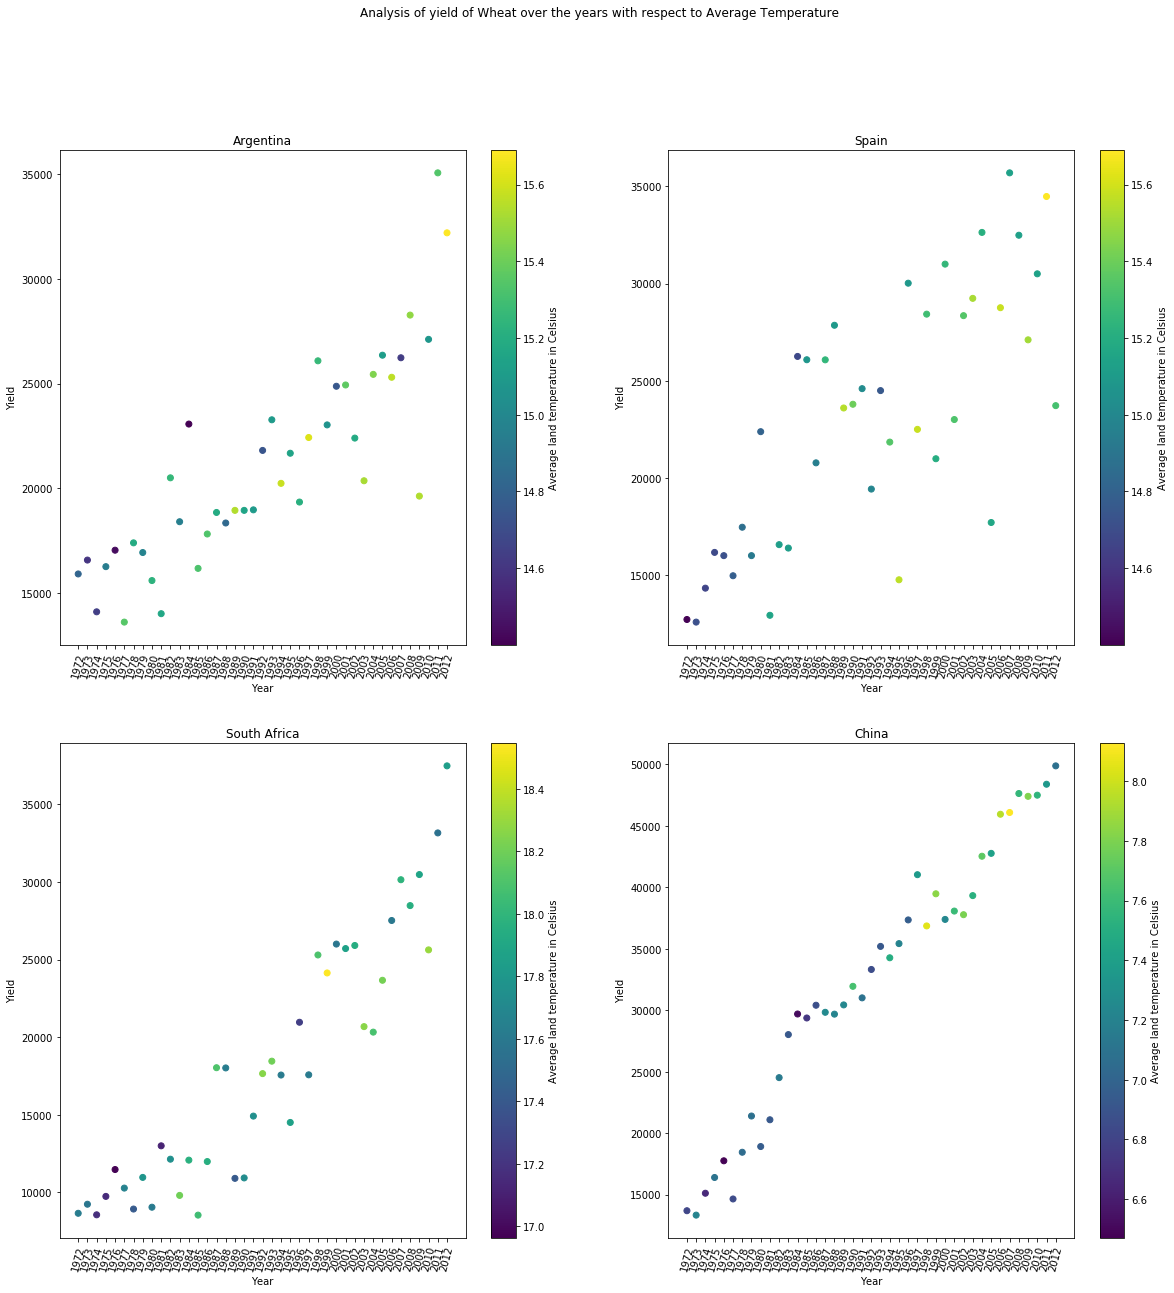

In [45]:
#Analysis has been performed on 4 random countries as it is not feasible to plot graphs for all countries
#The countries chosen were Argentina, Spain,South Africa and China
wht = wheat[(wheat['Country Name'].isin(['Argentina'])) & wheat['indicator'].isin(['Average Temperature','Yield'])]
wht1 = wheat[(wheat['Country Name'].isin(['Spain'])) & wheat['indicator'].isin(['Average Temperature','Yield'])]
wht2 = wheat[(wheat['Country Name'].isin(['South Africa'])) & wheat['indicator'].isin(['Average Temperature','Yield'])]
wht3 = wheat[(wheat['Country Name'].isin(['China'])) & wheat['indicator'].isin(['Average Temperature','Yield'])]
# Filtering the year data
x = wheat.columns[4:]
#Filtering out the yield data
y = wht.iloc[0][wheat.columns[4:]].T
#filtering out the land temperature data
z = wht.iloc[1][wheat.columns[4:]].T
x1 = wheat.columns[4:]
y1 = wht1.iloc[0][wheat.columns[4:]].T
z1 = wht1.iloc[1][wheat.columns[4:]].T
x2 = wheat.columns[4:]
y2 = wht2.iloc[0][wheat.columns[4:]].T
z2 = wht2.iloc[1][wheat.columns[4:]].T
x3 = wheat.columns[4:]
y3 = wht3.iloc[0][wheat.columns[4:]].T
z3 = wht3.iloc[1][wheat.columns[4:]].T
fig, axs = plt.subplots(2, 2,figsize=(20,20))
#Creating a subplot with 4 plots, one plot for each country
#Scatterplot to observe the relation between yield of wheat and land temperature in Argentina
argent = axs[0, 0].scatter(x,y,c = z)
clr = fig.colorbar(argent, ax = axs[0,0])
clr.set_label('Average land temperature in Celsius', rotation=90)
axs[0, 0].set_title('Argentina')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Yield')
#Scatterplot to observe the relation between yield of wheat and land temperature in Spain
spn = axs[0, 1].scatter(x1,y1,c = z1)
clr1 = fig.colorbar(argent, ax = axs[0,1])
clr1.set_label('Average land temperature in Celsius', rotation=90)
axs[0, 1].set_title('Spain')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Yield')
#Scatterplot to observe the relation between yield of wheat and land temperature in South Africa
sa= axs[1, 0].scatter(x2,y2,c = z2)
clr2 = fig.colorbar(sa, ax = axs[1,0])
clr2.set_label('Average land temperature in Celsius', rotation=90)
axs[1, 0].set_title('South Africa')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Yield')
#Scatterplot to observe the relation between yield of wheat and land temperature in China
chn = axs[1, 1].scatter(x3,y3,c = z3)
axs[1, 1].set_title('China')
clr3 = fig.colorbar(chn, ax = axs[1,1])
clr3.set_label('Average land temperature in Celsius', rotation=90)
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Yield')
axs[0,0].set_xticklabels(x, rotation=75)
axs[0,1].set_xticklabels(x1, rotation=75)
axs[1,0].set_xticklabels(x2, rotation=75)
axs[1,1].set_xticklabels(x3, rotation=75)
#plt.subplots_adjust(left=0.25, bottom=0.100, right=0.5, top=0.125, wspace=0.5, hspace=0.5)
fig.suptitle('Analysis on the yield of Wheat over the years with respect to Average Temperature', fontsize=12)
#plt.colorbar()
plt.show()

## Analyzing the effects of increasing land temperature on yield of Watermelon

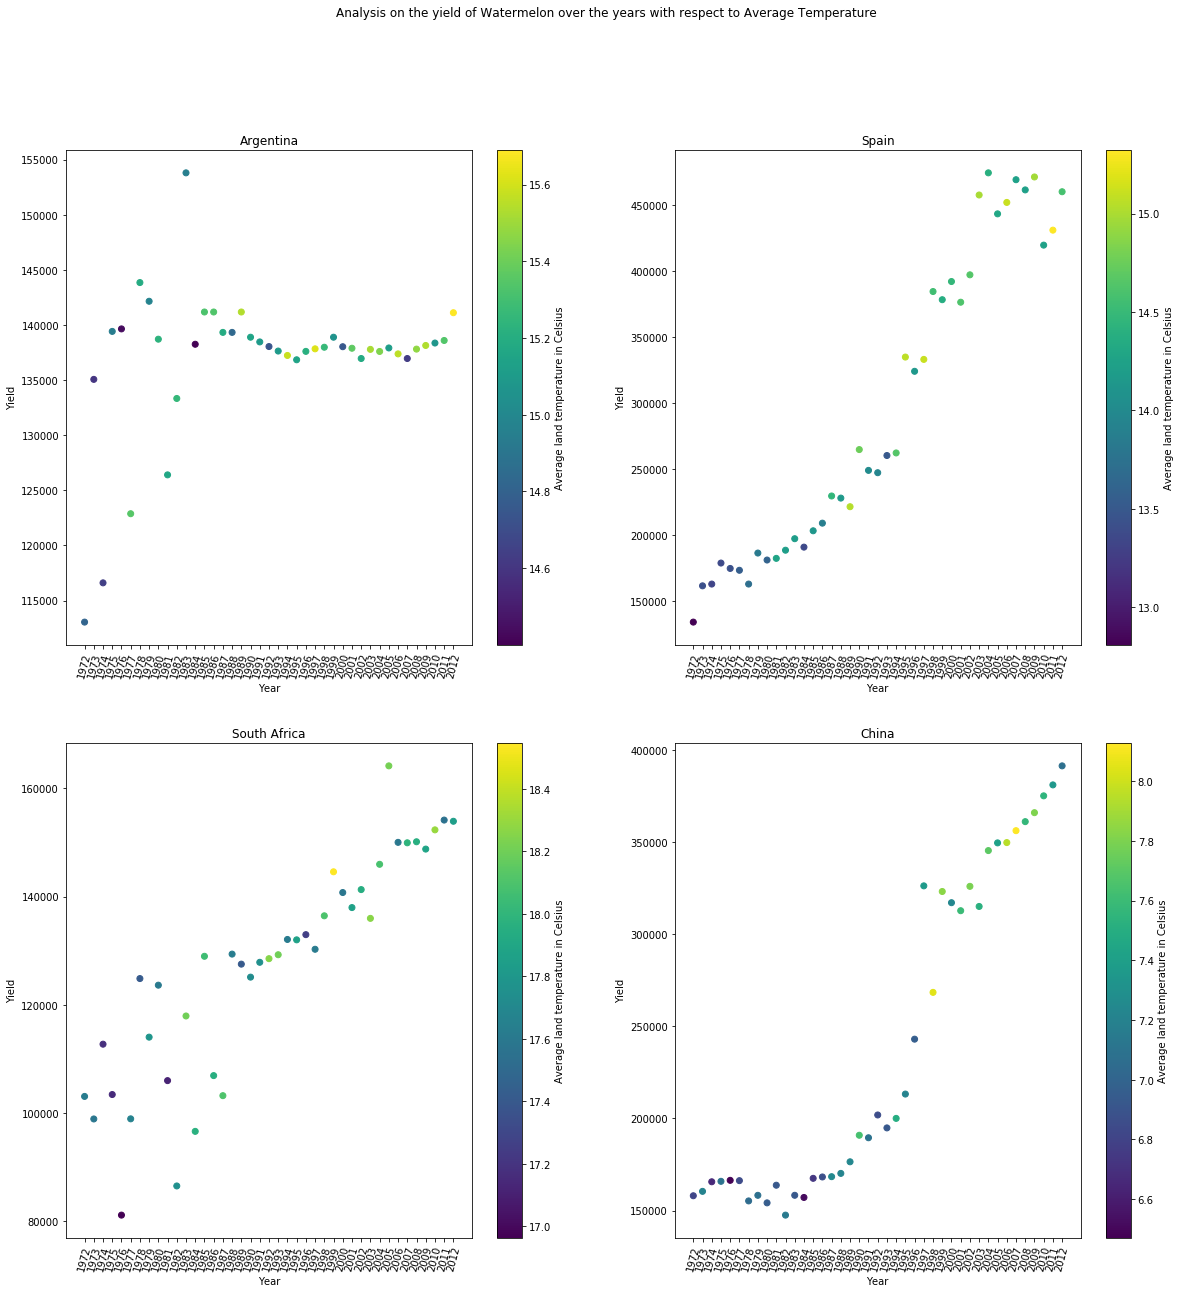

In [46]:
#Analysis has been performed on 4 random countries as it is not feasible to plot graphs for all countries
#The countries chosen were Argentina, Spain,South Africa and China
wtr = watermelon[(watermelon['Country Name'].isin(['Argentina'])) & watermelon['indicator'].isin(['Average Temperature','Yield'])]
wtr1 = watermelon[(watermelon['Country Name'].isin(['Spain'])) & watermelon['indicator'].isin(['Average Temperature','Yield'])]
wtr2 = watermelon[(watermelon['Country Name'].isin(['South Africa'])) & watermelon['indicator'].isin(['Average Temperature','Yield'])]
wtr3 = watermelon[(watermelon['Country Name'].isin(['China'])) & watermelon['indicator'].isin(['Average Temperature','Yield'])]
# Filtering the year data
a = watermelon.columns[4:]
#Filtering out the yield data
b = wtr.iloc[0][wheat.columns[4:]].T
#filtering out the land temperature data
c = wtr.iloc[1][wheat.columns[4:]].T
a1 = watermelon.columns[4:]
b1 = wtr1.iloc[0][wheat.columns[4:]].T
c1 = wtr1.iloc[1][wheat.columns[4:]].T
a2 = watermelon.columns[4:]
b2 = wtr2.iloc[0][wheat.columns[4:]].T
c2 = wtr2.iloc[1][wheat.columns[4:]].T
a3 = watermelon.columns[4:]
b3 = wtr3.iloc[0][wheat.columns[4:]].T
c3 = wtr3.iloc[1][wheat.columns[4:]].T
#Creating a subplot with 4 plots, one plot for each country
fig, axs = plt.subplots(2, 2,figsize=(20,20))
argent = axs[0, 0].scatter(a,b,c = c)
colr = fig.colorbar(argent, ax = axs[0,0])
colr.set_label('Average land temperature in Celsius', rotation=90)
axs[0, 0].set_title('Argentina')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Yield')
spn = axs[0, 1].scatter(a1,b1,c = c1)
colr1 = fig.colorbar(spn, ax = axs[0,1])
colr1.set_label('Average land temperature in Celsius', rotation=90)
axs[0, 1].set_title('Spain')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Yield')
sa = axs[1, 0].scatter(a2,b2,c = c2)
colr2 = fig.colorbar(sa, ax = axs[1,0])
colr2.set_label('Average land temperature in Celsius', rotation=90)
axs[1, 0].set_title('South Africa')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Yield')
chn = axs[1, 1].scatter(a3,b3,c = c3)
colr3 = fig.colorbar(chn, ax = axs[1,1])
colr3.set_label('Average land temperature in Celsius', rotation=90)
axs[1, 1].set_title('China')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Yield')
fig.suptitle('Analysis on the yield of Watermelon over the years with respect to Average Temperature', fontsize=12)
axs[0,0].set_xticklabels(a, rotation=75)
axs[0,1].set_xticklabels(a1, rotation=75)
axs[1,0].set_xticklabels(a2, rotation=75)
axs[1,1].set_xticklabels(a3, rotation=75)
plt.show()

## Scatter plots have been plotted to observe the effect of increasing land temperature on the yield of Wheat and Watermelon. Our initial hypothesis suggested that the yield of crops should fall over the years. Our hypothesis was proven wrong as we can observe that the yield has increased over the years. 
## Technological advances, improved variety of seeds and fertilizers, and better farming practices are contributing to the enhancement of the crop production globally to overcome the effects of increasing land temperature.

## Data Visulization 2

## Question : What are the effects of emissions on the yield of Wheat and Watermelon?

## According to our initial hypothesis , the yield of crops should decrease with the increasing Greenhouse gas emissions over the years.

## Analyzing the effects of increasing Greenhouse gas emissions on yield of Wheat

Populating the interactive namespace from numpy and matplotlib


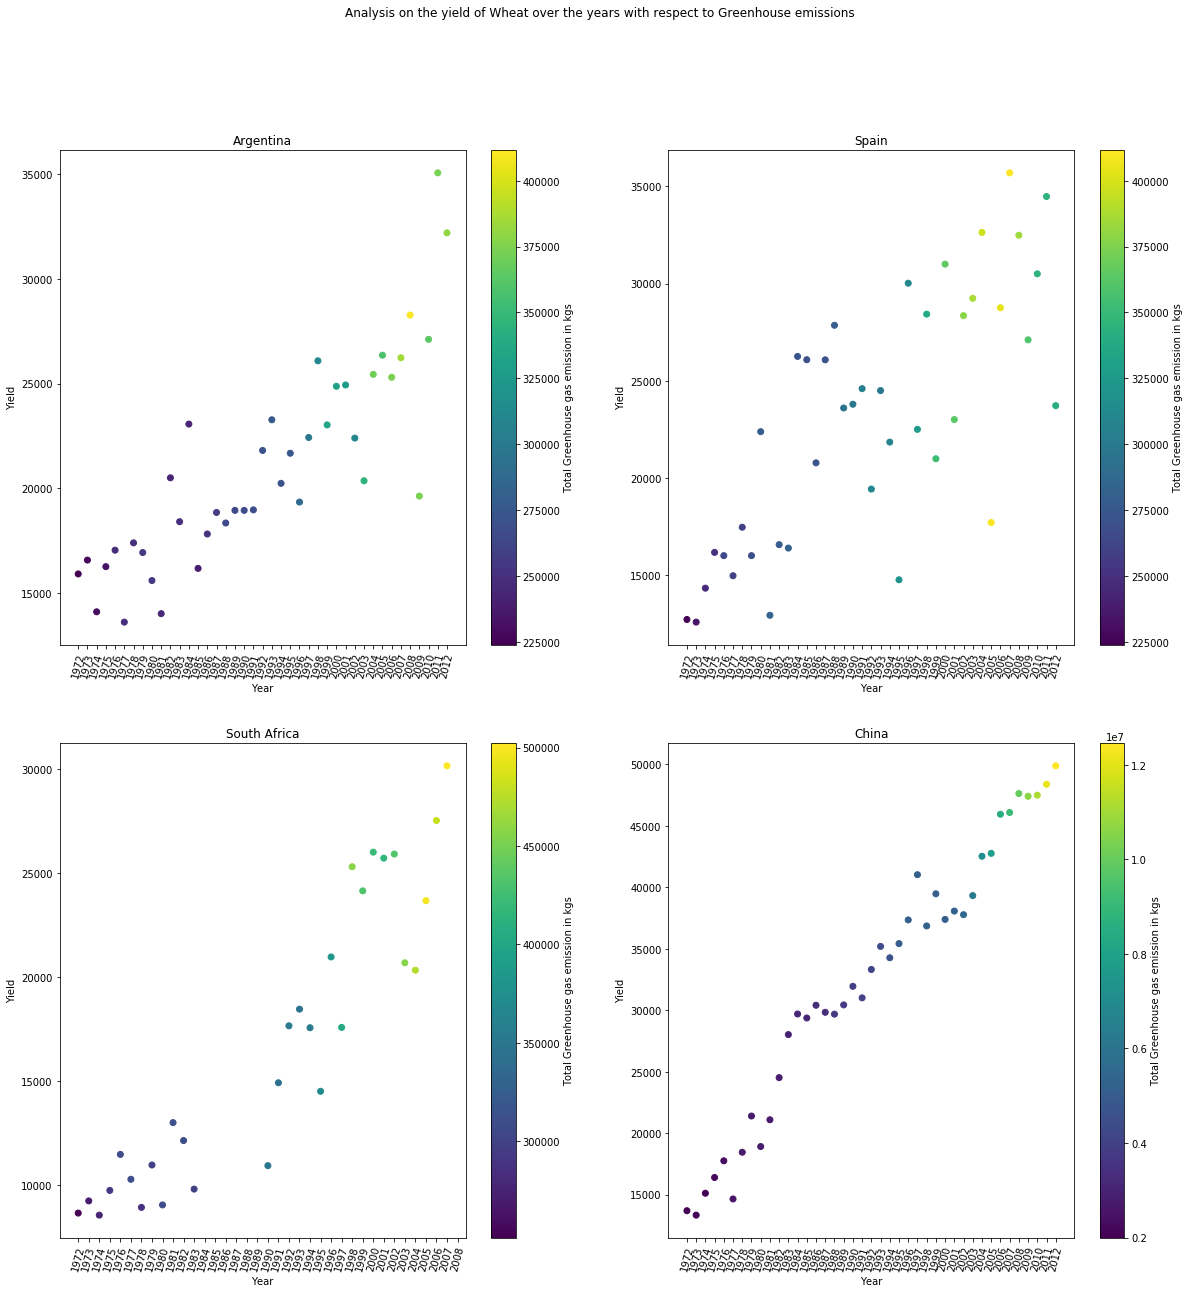

In [47]:
#Analysis has been performed on 4 random countries as it is not feasible to plot graphs for all countries
#The countries chosen were Argentina, Spain,South Africa and China
wheat0 = wheat[(wheat['Country Name'].isin(['Argentina'])) & wheat['indicator'].isin(['Total emissions','Yield'])]
wheat1 = wheat[(wheat['Country Name'].isin(['Spain'])) & wheat['indicator'].isin(['Total emissions','Yield'])]
wheat2 = wheat[(wheat['Country Name'].isin(['South Africa'])) & wheat['indicator'].isin(['Total emissions','Yield'])]
wheat3 = wheat[(wheat['Country Name'].isin(['China'])) & wheat['indicator'].isin(['Total emissions','Yield'])]
# Filtering the year data
x = wheat.columns[4:]
#Filtering out the yield data
y = wheat0.iloc[1][wheat.columns[4:]].T
#Filtering out the Total Emissions data
z = wheat0.iloc[0][wheat.columns[4:]].T
x1 = wheat.columns[4:]
y1 = wheat1.iloc[1][wheat.columns[4:]].T
z1 = wheat1.iloc[0][wheat.columns[4:]].T
x2 = wheat.columns[4:]
y2 = wheat2.iloc[1][wheat.columns[4:]].T
z2 = wheat2.iloc[0][wheat.columns[4:]].T
x3 = wheat.columns[4:]
y3 = wheat3.iloc[1][wheat.columns[4:]].T
z3 = wheat3.iloc[0][wheat.columns[4:]].T
%pylab inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2,figsize=(20,20))
argent = axs[0, 0].scatter(x,y,c = z)
clr = fig.colorbar(argent, ax = axs[0,0])
clr.set_label('Total Greenhouse gas emission in kgs', rotation=90)
axs[0, 0].set_title('Argentina')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Yield')
#Scatterplot to observe the relation between yield of wheat and land temperature in Spain
spn = axs[0, 1].scatter(x1,y1,c = z1)
clr1 = fig.colorbar(argent, ax = axs[0,1])
clr1.set_label('Total Greenhouse gas emission in kgs', rotation=90)
axs[0, 1].set_title('Spain')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Yield')
#Scatterplot to observe the relation between yield of wheat and land temperature in South Africa
sa= axs[1, 0].scatter(x2,y2,c = z2)
clr2 = fig.colorbar(sa, ax = axs[1,0])
clr2.set_label('Total Greenhouse gas emission in kgs', rotation=90)
axs[1, 0].set_title('South Africa')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Yield')
#Scatterplot to observe the relation between yield of wheat and land temperature in China
chn = axs[1, 1].scatter(x3,y3,c = z3)
axs[1, 1].set_title('China')
clr3 = fig.colorbar(chn, ax = axs[1,1])
clr3.set_label('Total Greenhouse gas emission in kgs', rotation=90)
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Yield')
axs[0,0].set_xticklabels(x, rotation=75)
axs[0,1].set_xticklabels(x1, rotation=75)
axs[1,0].set_xticklabels(x2, rotation=75)
axs[1,1].set_xticklabels(x3, rotation=75)
fig.suptitle('Analysis on the yield of Wheat over the years with respect to Greenhouse emissions', fontsize=12)
axs[0,0].set_xticklabels(x, rotation=75)
axs[0,1].set_xticklabels(x1, rotation=75)
axs[1,0].set_xticklabels(x2, rotation=75)
axs[1,1].set_xticklabels(x3, rotation=75)
plt.show()

## Analyzing the effects of increasing Greenhouse gas emissions on yield of Watermelon

Populating the interactive namespace from numpy and matplotlib


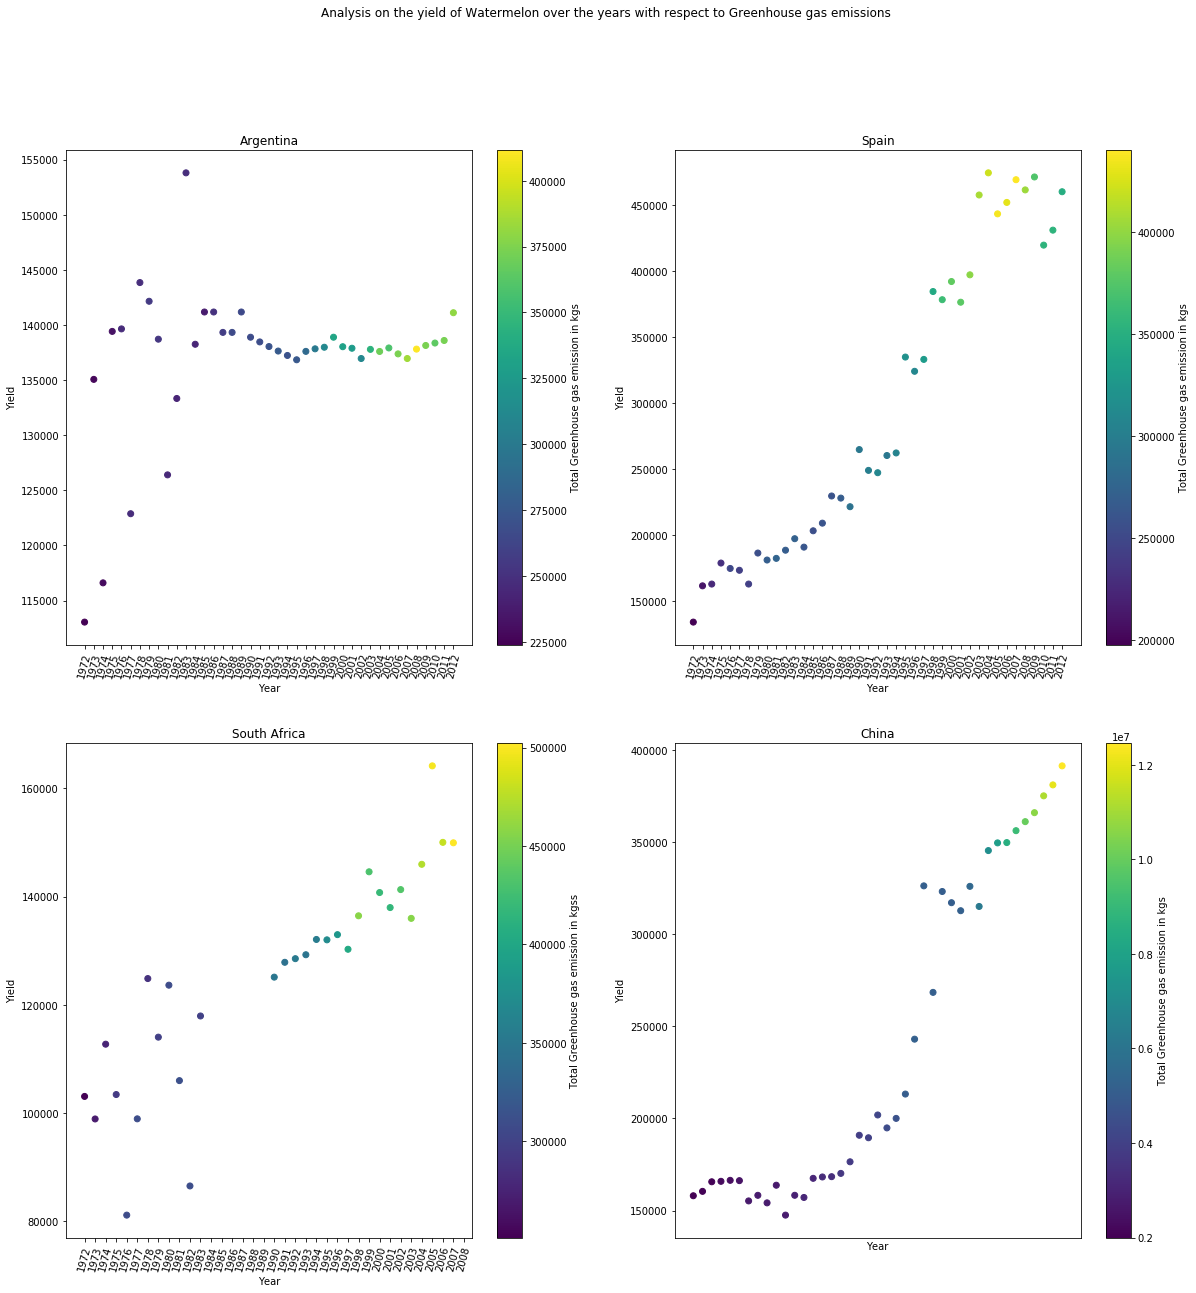

In [48]:
#Analysis has been performed on 4 random countries as it is not feasible to plot graphs for all countries
#The countries chosen were Argentina, Spain,South Africa and China
watr = watermelon[(watermelon['Country Name'].isin(['Argentina'])) & watermelon['indicator'].isin(['Total emissions','Yield'])]
watr1 = watermelon[(watermelon['Country Name'].isin(['Spain'])) & watermelon['indicator'].isin(['Total emissions','Yield'])]
watr2 = watermelon[(watermelon['Country Name'].isin(['South Africa'])) & watermelon['indicator'].isin(['Total emissions','Yield'])]
watr3 = watermelon[(watermelon['Country Name'].isin(['China'])) & watermelon['indicator'].isin(['Total emissions','Yield'])]
# Filtering the year data
a = watermelon.columns[4:]
#Filtering out the yield data
b = watr.iloc[1][wheat.columns[4:]].T
#filtering out the land temperature data
c = watr.iloc[0][wheat.columns[4:]].T
a1 = watermelon.columns[4:]
b1 = watr1.iloc[1][wheat.columns[4:]].T
c1 = watr1.iloc[0][wheat.columns[4:]].T
a2 = watermelon.columns[4:]
b2 = watr2.iloc[1][wheat.columns[4:]].T
c2 = watr2.iloc[0][wheat.columns[4:]].T
a3 = watermelon.columns[4:]
b3 = watr3.iloc[1][wheat.columns[4:]].T
c3 = watr3.iloc[0][wheat.columns[4:]].T
%pylab inline
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2,figsize=(20,20))
plt.xticks([])
argent = axs[0, 0].scatter(a,b,c = c)
colr = fig.colorbar(argent, ax = axs[0,0])
colr.set_label('Total Greenhouse gas emission in kgs', rotation=90)
axs[0, 0].set_title('Argentina')
axs[0,0].set_xlabel('Year')
axs[0,0].set_ylabel('Yield')
spn = axs[0, 1].scatter(a1,b1,c = c1)
colr1 = fig.colorbar(spn, ax = axs[0,1])
colr1.set_label('Total Greenhouse gas emission in kgs', rotation=90)
axs[0, 1].set_title('Spain')
axs[0,1].set_xlabel('Year')
axs[0,1].set_ylabel('Yield')
sa = axs[1, 0].scatter(a2,b2,c = c2)
colr2 = fig.colorbar(sa, ax = axs[1,0])
colr2.set_label('Total Greenhouse gas emission in kgss', rotation=90)
axs[1, 0].set_title('South Africa')
axs[1,0].set_xlabel('Year')
axs[1,0].set_ylabel('Yield')
chn = axs[1, 1].scatter(a3,b3,c = c3)
colr3 = fig.colorbar(chn, ax = axs[1,1])
colr3.set_label('Total Greenhouse gas emission in kgs', rotation=90)
axs[1, 1].set_title('China')
axs[1,1].set_xlabel('Year')
axs[1,1].set_ylabel('Yield')
fig.suptitle('Analysis on the yield of Watermelon over the years with respect to Greenhouse gas emissions', fontsize=12)
axs[0,0].set_xticklabels(x, rotation=75)
axs[0,1].set_xticklabels(x1, rotation=75)
axs[1,0].set_xticklabels(x2, rotation=75)
axs[1,1].set_xticklabels(x3, rotation=75)
plt.show()


## Scatter plots have been plotted to observe the effect of increase in emissions on the yield of Wheat and Watermelon. Our initial hypothesis suggested that the yield of crops should fall over the years, however our hypothesis was proven wrong as we can observe that the yield has increased over the years. 
## Studies have shown that higher concentrations of atmospheric carbon dioxide affect crop yield in two important ways: they boost crop yields by increasing the rate of photosynthesis, which spurs growth, and they reduce the amount of water crops lose through transpiration.

## Data Visualization 3

## Question: How has the temperature changed over the centuries and how has it changed from the 19th to 20th century and from the 20th to 21st century?

In [49]:
# importing the necessary packages here
import matplotlib.pyplot as plt
import matplotlib
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
import re
import io
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
%matplotlib inline

from IPython.display import HTML

import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df.head()
#taking centuries as one column to map data accordingly
df['Century'] = df['dt'].map(lambda i: i[:2])

In [51]:
country_raw = df.groupby(['Country', 'Century'])['AverageTemperature'].mean().unstack()
country_raw.columns.name = None      
country_raw = country_raw.reset_index()  

year = ['18','19','20'] #specifying the centuries in a list
for k in year :
    year = int(k)+1 # taking 1 plus to map proper centuries
    data =  dict(
            type = 'choropleth',
            colorscale = 'Reds',
            locations = country_raw['Country'],
            locationmode = 'country names',
            z = country_raw[k], 
            text = country_raw['Country'], # text to hover here
            colorbar = {'title': 'Temperature, °C'})

    layout = dict( title = 'Temperature across the world in '+ str(year)+ 'th century',
             geo = dict(showframe = False,
             projection = {'type' : 'hammer'}))

    choromap3 = go.Figure(data = [data],layout=layout)
    iplot(choromap3)

## The above visulization shows us how the land temperatures have varied from the 19th Century to the 21st Century.
If we have a closer look at the data, we can notice that the temperature from the 19th Century to the 20th Century on an average increased by half a degree across the globe. The second Industrial revolution dating from 1870-1914 has been the major contributor towards this temperature increase.
The temperature increase from the 20th Century to 21st Century has been more alarming, due to the exponential increase in the industrial activities across the globe, the average temperature has almost increased by one degree.

A half degree or one degree increase might not seem too alarming to the general public, but according to the scientific community a half degree increase in land temperature could cause:

1)Heat-wave duration, rainstorm intensity and sea-level rise would increase by roughly a third (and sea level is likely to continue rising long after air temperature is stabilized).

2)There would be a disproportionately greater impact on certain basic crops.

3)Tropical coral reefs would be adverely impacted.


# Data Visulization 4

Temperature Trend in Developed Countries vs Developing Countries

## Question: How does the Average temperature vary across developing countires and developed countries

In [52]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py #importing plotly
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns 
import warnings #ignoring warnings
warnings.filterwarnings('ignore')
#importing the file which has the data of average temperature by countries
temp_country=pd.read_csv('GlobalLandTemperaturesByCountry.csv')

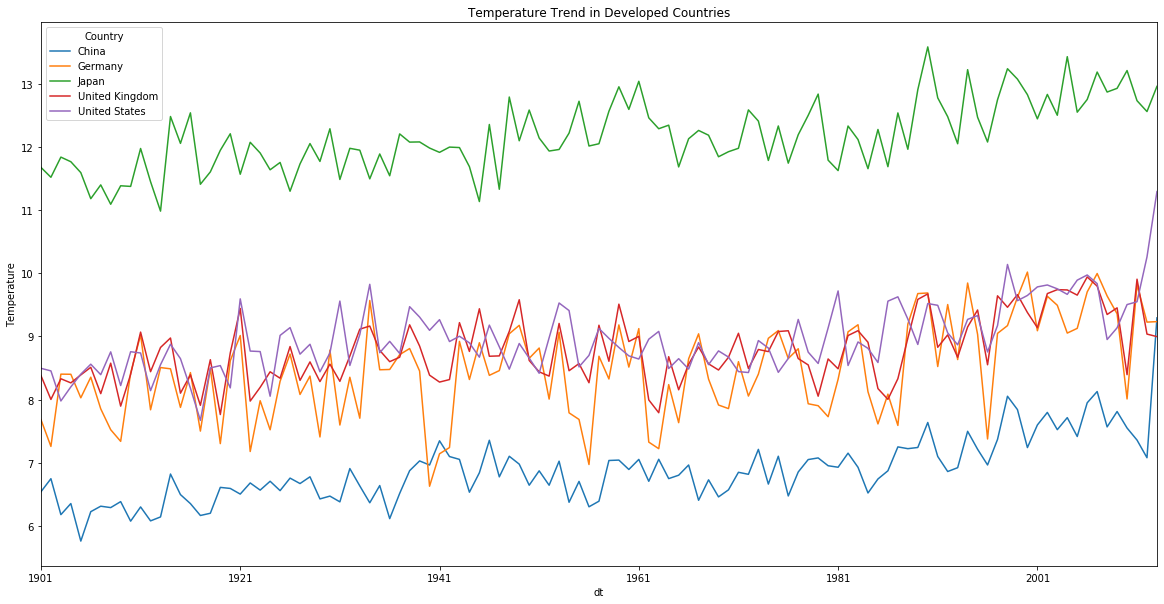

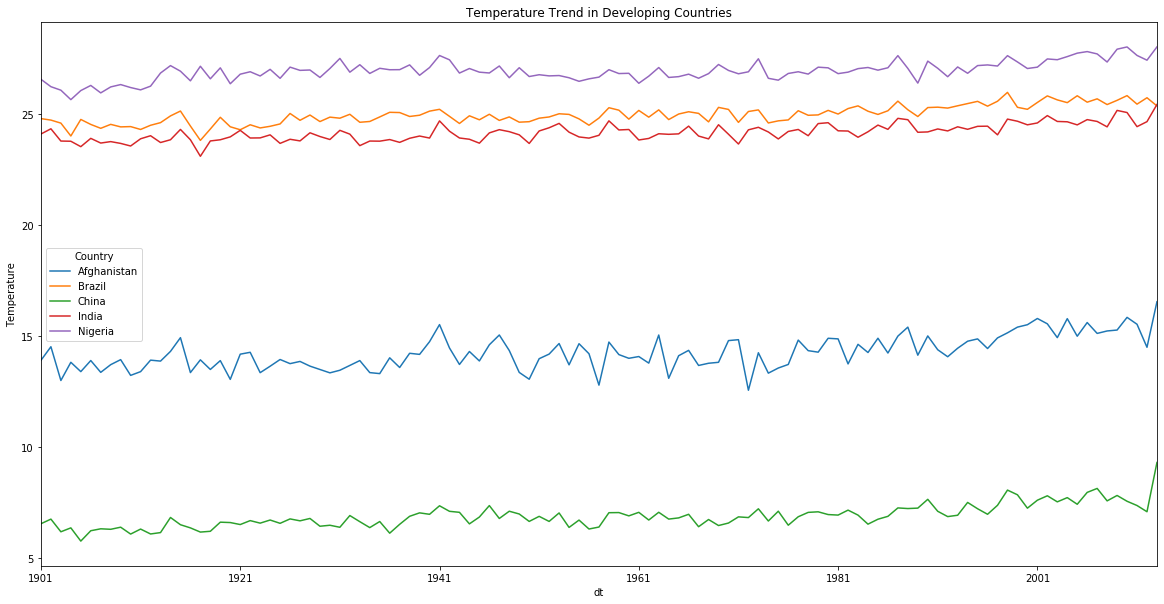

In [53]:
developedcountries=temp_country.copy()
developedcountries['dt']=pd.to_datetime(developedcountries.dt).dt.strftime('%d/%m/%Y') #converting index in the proper format so that can be plotted on the graph
developedcountries['dt']=developedcountries['dt'].apply(lambda x: x[6:])
developedcountries=developedcountries[developedcountries['AverageTemperature']!=0]
developedcountries.drop('AverageTemperatureUncertainty',axis=1,inplace=True) #dropping the columns which are not needed
developed=['United States','China','Japan','Germany','United Kingdom'] #developed countries list
developedcountries=developedcountries[developedcountries['Country'].isin(developed)]
developedcountries=developedcountries.groupby(['Country','dt'])['AverageTemperature'].mean().reset_index() #resetting the index 
developedcountries=developedcountries[developedcountries['dt'].astype(int)>1900] #considering the data of years after 1990 to compare
abc=developedcountries.pivot('dt','Country','AverageTemperature')
f,ax=plt.subplots(figsize=(20,10))
plt.ylabel('Temperature')
plt.xlabel('Date')
plt.title('Temperature Trend in Developed Countries')
abc.plot(ax=ax)



developingcountries=temp_country.copy()
developingcountries['dt']=pd.to_datetime(developingcountries.dt).dt.strftime('%d/%m/%Y')  #converting index in the proper format so that can be plotted on the graph
developingcountries['dt']=developingcountries['dt'].apply(lambda x: x[6:])
developingcountries=developingcountries[developingcountries['AverageTemperature']!=0]
developingcountries.drop('AverageTemperatureUncertainty',axis=1,inplace=True)  #dropping the columns which are not needed
developing=['India','Brazil','China','Afghanistan','Nigeria'] # developing countries list
developingcountries=developingcountries[developingcountries['Country'].isin(developing)]
developingcountries=developingcountries.groupby(['Country','dt'])['AverageTemperature'].mean().reset_index()  #resetting the index
developingcountries=developingcountries[developingcountries['dt'].astype(int)>1900]  #considering the data of years after 1990 to compare
dc=developingcountries.pivot('dt','Country','AverageTemperature')
f,ax=plt.subplots(figsize=(20,10))
plt.title('Temperature Trend in Developing Countries')
plt.ylabel('Temperature')
plt.xlabel('Date')
dc.plot(ax=ax)


 ## In the above Visulization we can see the Temperature Trend from the 20th Century onwards between the developed countries and the developing countries.
If we take a closer look then we can see that the temperatures in the developed countries have been more fluctuating as compared to the developing countries, this could be because there was rapid industrilization during that period in the developed countries and not so much in the developing countires.

But the temperatures are starting to rise in the developing countires at the end of the 20th century, and we predict the there would be more increase of temperatures in the developing countries during the next century.

## Data Visualization 5

## A visual presentation of the increase in temperature across the globe.

In [54]:
#importing the imageio, base64 libraires
import imageio
import base64
from PIL import Image
import io

In [55]:
#reading the csv file which contains the land temperatures over the years
df = pd.read_csv("GlobalLandTemperaturesByCountry.csv")
df.head()
#creating a column year and populating it with the year for which the data is present
df['year'] = pd.to_datetime(df['dt']).dt.year

In [56]:
#importing the glob library
import glob
country_raw = df.groupby(['Country', 'year'])['AverageTemperature'].mean().unstack()
country_raw.columns.name = None      
country_raw = country_raw.reset_index()  

year = df["year"].unique()
#creating a map with the temperatures across the countries for every year
for k in year :
    year = int(k)+1
    data =  dict(
            type = 'choropleth',
            colorscale = 'Reds',
            locations = country_raw['Country'],
            locationmode = 'country names',
            z = country_raw[k],
            text = country_raw['Country'],
            colorbar = {'title': 'Temperature, °C'})

    layout = dict( title = 'Temperature across the world in year '+ str(year),
             geo = dict(showframe = False,
             projection = {'type' : 'hammer'}))
    # Saving the images dynamically for every year in a file names all_years1
    choromap3 = go.Figure(data = [data],layout=layout)
    choromap3.write_image("C:\\Users\\Shreyreddy92\\Downloads\\all_years1\\" + str(k) + ".png" )


In [57]:
#Creating a Gif by using all the images stores in the file all_years1
images_loc = sorted(glob.glob(r"C:\Users\Shreyreddy92\Downloads\all_years1\*.png"))
#Setting the time between every image to be 0.01 seconds
kargs = { 'duration': 0.01 }
images = [Image.open(i) for i in images_loc]
#saving the gif
imageio.mimsave(r"C:\Users\Shreyreddy92\Downloads\all_years\movie.gif", images, **kargs)

In [58]:
#The gif was converted to a video and saved
from IPython.display import Video
#playing the video
Video("C:\\Users\\Shreyreddy92\\Downloads\\Data_visualization3.mp4")

## Data Visualization 6

## Question : Which countries are being affected the most by the relase of Co2 emissions?

In [59]:
df1 = pd.read_csv('merging_data_updated.csv')

In [60]:
#Importing the merged dataframe created before
df = pd.read_csv('merging_data_updated.csv')
#Creating an empty dataframe with country name and correlation coefficient as columns
df1 = pd.DataFrame(columns=['Country Name','Correlation Coeffecient'])
#Iterating through the merged dataframe
for index,rows in df.iterrows():
#Creating an empty list for the temperatures.This list is cleared for every iteration of the loop 
    temp_list= list()
#Creating an empty list for the emissions .This list is cleared for every iteration of the loop
    emi_list = list()
#Picking the temperatures for a single country from 1972-2012 and placing them in the temp_list
    temp_list = df.iloc[index,1:42]
  ##Picking the temperatures for a single country from 1972-2012 and placing them in the temp_list
    emi_list = df.iloc[index,42:83]
#Calculating the overall correlation coefficient from 1972-2012 based on the values in the lists created above
    correlation = np.corrcoef(np.array(temp_list).astype(float),np.array(emi_list).astype(float))
#Appending the country name and correlation coeffecient to the dataframe
    df1 = df1.append({'Country Name':df.iloc[index,0],'Correlation Coeffecient':str(np.corrcoef(np.array(temp_list).astype(float),np.array(emi_list).astype(float))[0][1])},ignore_index=True)



In [61]:
countries = np.unique(df1['Country Name'])
data = [ dict(
        type = 'choropleth',
        locations = countries, #location of countries
        z = df1['Correlation Coeffecient'], #mapping correlation coefficents to display for countries
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = 'Correlation')
            )
       ]
layout = dict(
    title = 'Correlation Between CO2 Emissions and Average Temperature',
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        projection = dict(
        type = 'orthographic',
            rotation = dict(
                    lon = 60,    #specifying the Longitude and latitude
                    lat = 10),
        ),
        lonaxis =  dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
            ),
        lataxis = dict(
                showgrid = True,
                gridcolor = 'rgb(102, 102, 102)'
                )
            ),
        )

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')

## Machine learning

## Forecasting the average land temperatures in the upcoming years

## Step 1: Augmented Dickey Fullers test has been carried out to calculate the P-value and Test statistic value to determine if there is trend in the data. If a trend has been detected , it has to be eliminated in order to use the time series models.

In [62]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller
country = pd.read_csv("GlobalTemperatures.csv")
country['Year']= pd.DatetimeIndex(country['dt']).year
country = country.dropna()
country.reset_index(drop=True,inplace=True)
results = country.groupby(by="Year").agg({'LandAverageTemperature': ['mean'], 
                                            'LandAverageTemperatureUncertainty': ['mean'],"LandMaxTemperature":["max"],"LandMinTemperature":["max"]})
results.columns = results.columns.droplevel()
results = results["mean"]
results = results.iloc[:,0:1]
res = adfuller(results["mean"])
print(res[0])
print(res[1])



-0.08876200081533325
0.9505464412068485


## Here we can see after running ADF test that the values of T-test and P value show that there is a trend in data and we need to remove the trend from data to apply our SARIMAX or say the ARIMA model on it

## After performing the ADF test, we have oberved that the T-test and P value indicate a trend in the data. In order to use the SARIMAX or ARIMA model, we have to eliminate the trend

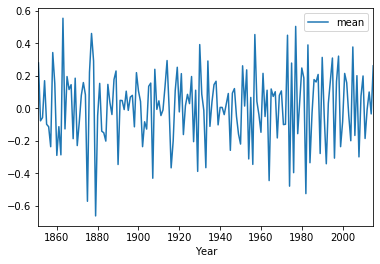

In [63]:
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
results = results.iloc[:,0:1].diff().dropna()
results.plot.line()

In [64]:
res = adfuller(results["mean"])
print(res[0])
print(res[1])

-13.53065723953561
2.6256268654643265e-25


## A low P-value and Test statistic value can be observed which shows us that the  trend in the data has been eliminated. The ARIMA and SARIMAX model can be applied to the data. The SARIMAX model requires two parameters, P and Q. Q dentoes the lag in data between the previous years and the future years. P represents the autocorrealtion . It verifies if the residuals are independent or not. We pass the the P and Q parameters in the SARIMAX model.

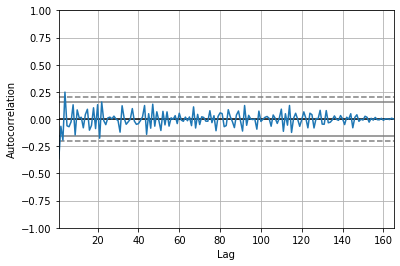

In [65]:
from statsmodels.graphics.tsaplots import plot_pacf # checking the lags
from statsmodels.graphics.tsaplots import plot_acf
autocorrelation_plot(results)
pyplot.show()

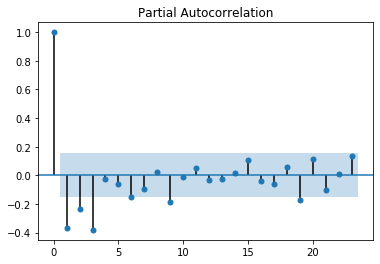

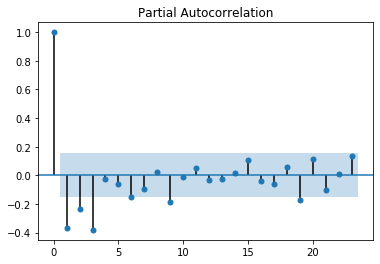

In [66]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
plot_pacf(results)  

## Here we have calculated the P value and Q value which is always needne in ARIMA modeling, here P is for the Auto regressive part and Q is for the moving average art which we get rough estimate from the above grapghs as we calculate the values of P by where it cutes the 95% confidence interval and Q is found by the lags created 

## The ARIMA model requires two parameters, P and Q. P represents the auto regressive component of the model and Q represents the moving average component. P is determined at the point where it cuts the 95% confidence interval and Q is calculated by the lags created.

In [67]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# set up the model
%pylab inline
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
import plotly.graph_objects as go
model = SARIMAX(results["mean"],order=(1,0,4)) #entering the P and Q as we have obtained above,also taking in D value which is zero as we hav already lagged the data by 1
res= model.fit()
forecast = res.get_prediction(start = 25)
mean_forecast = forecast.predicted_mean
confidence_intervals = forecast.conf_int()
mean_forecast

Populating the interactive namespace from numpy and matplotlib


Year
1876    0.236456
1877    0.049949
1878   -0.101712
1879   -0.379673
1880    0.042261
1881    0.103261
1882    0.125744
1883    0.076389
1884    0.136422
1885    0.282535
1886    0.090977
1887    0.068492
1888    0.014995
1889   -0.088040
1890   -0.182011
1891   -0.003241
1892   -0.029724
1893    0.059647
1894   -0.033787
1895   -0.063513
1896   -0.012686
1897   -0.098284
1898   -0.079123
1899   -0.009565
1900   -0.138704
1901   -0.111435
1902   -0.173653
1903    0.028103
1904    0.091339
1905    0.178526
          ...   
1986    0.003638
1987    0.073751
1988   -0.084990
1989   -0.259223
1990    0.011509
1991   -0.209237
1992   -0.043498
1993    0.070691
1994    0.103375
1995    0.055555
1996   -0.219192
1997    0.007788
1998   -0.110640
1999   -0.176124
2000   -0.078453
2001   -0.034090
2002   -0.020949
2003   -0.155389
2004   -0.128820
2005    0.053423
2006   -0.157330
2007    0.007023
2008   -0.193054
2009    0.124775
2010   -0.014177
2011   -0.038355
2012    0.033965
2013   -0

## The forecasted model fairly predicts the temperatures in the upcoming years and displays a trend similar to the original trend in the land temperatures.

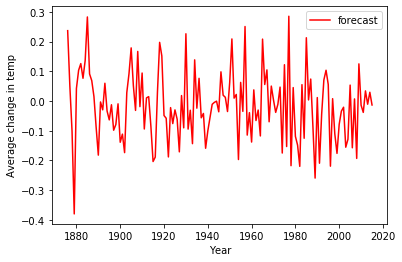

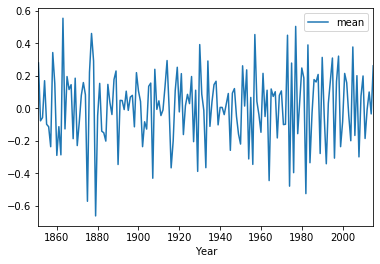

In [68]:
plt.plot(mean_forecast.index, mean_forecast.values, color='r', label='forecast')
plt.xlabel('Year') 
plt.ylabel('Average change in temp')
plt.legend()
results.plot.line()
plt.show()

## following is the summary of the forcasted time series which shows p values are small enough and model it a good fit also stderror is 41% less than compared to that of series

## From the summary of the forecasted time series it can be observed that the P values are low, hence the model is a good fit. The standard error of the model is lower by 40% when compared to a series.

In [69]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                   mean   No. Observations:                  165
Model:               SARIMAX(1, 0, 4)   Log Likelihood                  42.306
Date:                Thu, 12 Dec 2019   AIC                            -72.612
Time:                        17:45:44   BIC                            -53.976
Sample:                             0   HQIC                           -65.047
                                - 165                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1465      0.338     -0.434      0.664      -0.808       0.515
ma.L1         -0.4065      0.328     -1.239      0.215      -1.049       0.236
ma.L2         -0.1946      0.180     -1.082      0.279      -0.547       0.158
ma.L3         -0.2215      0.085     -2.612      0.009      -0.388      -0.055
ma.L4          0.2235      0.087      2.561      0.010       0.052       0.394
sigma2         0.0349      0.004      7.968      0.000       0.026       0.043
===================================================================================
Ljung-Box (Q):                       37.10   Jarque-Bera (JB):                 1.65
Prob(Q):                              0.60   Prob(JB):                         0.44
Heteroskedasticity (H):               1.01   Skew:                            -0.17
Prob(H) (two-sided):                  0.97   Kurtosis:                         2.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Conclusion

### Based on our  analysis, we conclude that 
### 1) It can be observed that the global land temperature has been rising steadily and is expected to do so in the future. This can be attributed to human activities such as industrilization.
### 2) There has been a spike in the temperatures during the two main industrial revolutions. 
### 3) In more developed countries the temperature began to register much earlier. The developing nations are registering a greater spike in the past decade as they are subject to more rapid industrializtion.
### 4) The rise in land temperature and the Greenhouse gas effects have no bearing on the yield of crops.  